__EDA__ involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better.

As we noticed in the `Data_Wrangling` notebook, the data is pretty much clean with no NaN observations.

### Import libraries

In [1]:
# Essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_style("darkgrid")
# sns.set(rc={"figure.dpi":300})
# plt.rcParams["figure.dpi"] = 300

### Read data

In [2]:
# Importing train and test subsets
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")
test_labels_df = pd.read_csv("../data/test_labels.csv")

In [3]:
# Take a look at the data
train_df.sample(n=5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
127532,aa184d4535bb993c,We don't say what the one rational root is.,0,0,0,0,0,0
75394,c9b421395d25206d,"""\nSo you wrote yourself: this article is more...",0,0,0,0,0,0
75648,ca678d42144fbb2d,Your objections to that sentence are quite cor...,0,0,0,0,0,0
142163,f8701478c5791b9b,""", 13 April 2008 (UTC)\n\nPersonally, I think ...",0,0,0,0,0,0
9517,1939bf562fde3cf1,"Also, just in the last minute it looks like th...",0,0,0,0,0,0


In [4]:
test_df.sample(n=5)

,id,comment_text
84514,8cf4737fbfceb034,jesus wont let me cuz he like pisachios!!!!
18679,1f6b637278cea8d7,Gene told me the story directly about how he m...
44486,49c2b78ea3e8c343,:::::Thank you( )
77124,8097a8c6c713a2c4,. The article's title is really just a small p...
62574,682d87e6d3130733,"""This message is regarding the article Vacuole..."


The data comes from a large number of Wikipedia comments which have been labeled by human raters for toxic behavior.

In [5]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None


### Data analysis

In [6]:
# Concatenate test and test_labels onto one dataFrame
test_df = pd.merge(left=test_df, right=test_labels_df, on=["id"])

# print total observations in train and test subsets
print("Train DataFrame:\t{}".format(train_df.shape))
print("Test DataFrame: \t{}".format(test_df.shape))

Train DataFrame:	(159571, 8)
Test DataFrame: 	(153164, 8)


In [7]:
# Check for clean comments
train_df["tags"] = np.sum(train_df.iloc[:, 2:], axis=1)
test_df["tags"] = np.sum(test_df.iloc[:, 2:], axis=1)
# print(train_df["tags"].sample(10))
train_df["is_clean"] = train_df["tags"].apply(lambda x : 1 if x == 0 else 0)
test_df["is_clean"] = test_df["tags"].apply(lambda x: 1 if x == 0 else 0)

We can notice that there are multiple cases where a comment has more than one label.

In [8]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tags,is_clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,1


In [9]:
test_df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tags,is_clean
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,-1,-1,-1,-1,-1,-1,-6,0
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,-1,-1,-1,-1,-1,-1,-6,0
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",-1,-1,-1,-1,-1,-1,-6,0
3,00017563c3f7919a,":If you have a look back at the source, the in...",-1,-1,-1,-1,-1,-1,-6,0
4,00017695ad8997eb,I don't anonymously edit articles at all.,-1,-1,-1,-1,-1,-1,-6,0


A value of `-1` indicates the observation wasn't used for scoring on the dataset. Thus, we proceed to eliminate these observations from the test set.

In [10]:
test_df = test_df[test_df["tags"] >= 0]

In [11]:
test_df["tags"].value_counts()

0    57735
3     2081
1     1842
2     1530
4      611
5      165
6       14
Name: tags, dtype: int64

In [12]:
total_comm = train_df.shape[0]
total_clean_comm = train_df["is_clean"].sum()
total_not_clean_comm = total_comm - total_clean_comm

print("Total comments: {}".format(total_comm))
print("Total clean comments: {}".format(total_clean_comm))
print("Total not clean comments: {}".format(total_not_clean_comm))

Total comments: 159571
Total clean comments: 143346
Total not clean comments: 16225


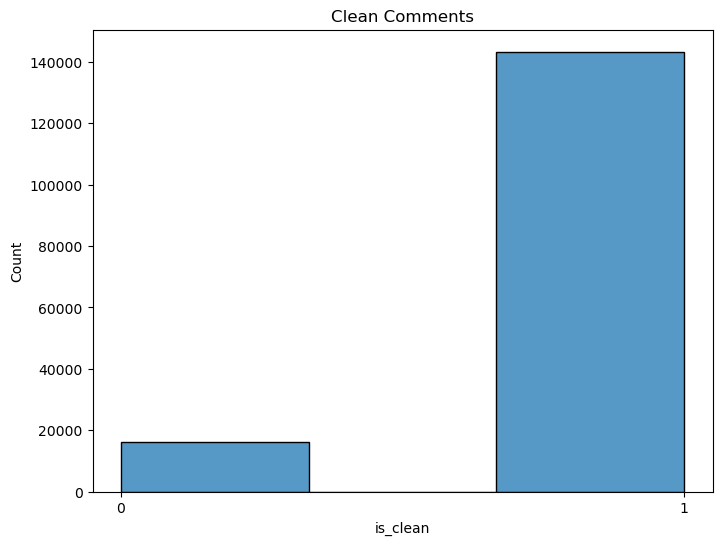

In [13]:
# Visualization of comments on the training dataset
f, ax = plt.subplots(figsize=(8, 6))
sns.histplot(train_df["is_clean"], bins=3)
ax.set_xticks([0, 1])
ax.set_title("Clean Comments")
plt.show()

In [14]:
comment_types = train_df.iloc[:, 2:-2].sum()
print(comment_types)

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


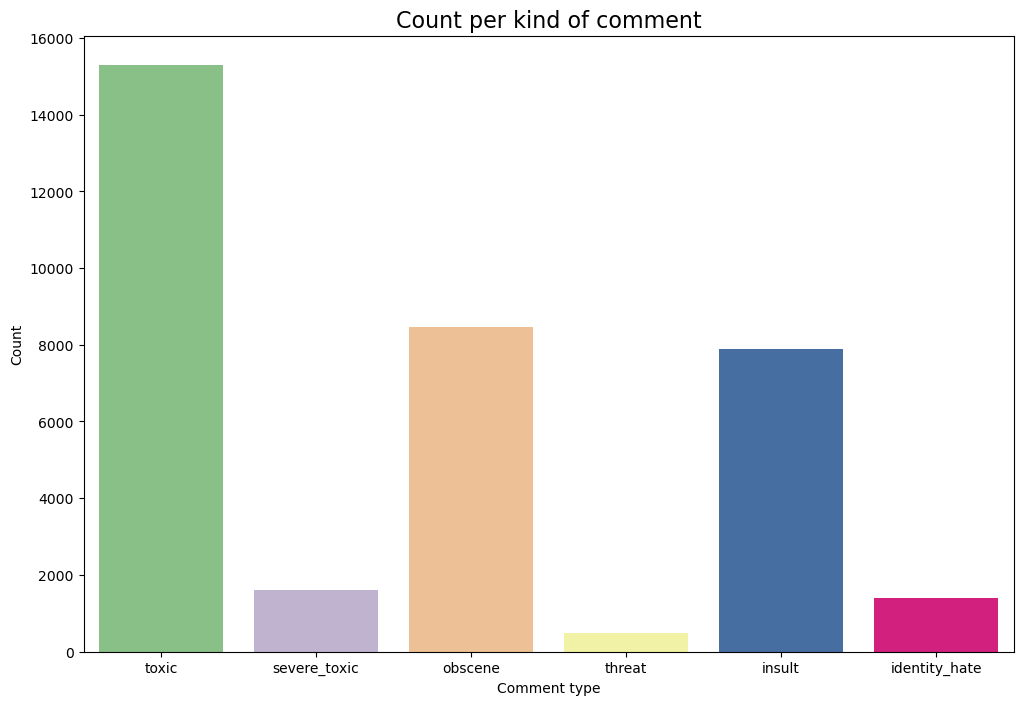

In [15]:
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(
    x=comment_types.index,
    y=comment_types.values,
    palette="Accent"
)
ax.set_title("Count per kind of comment", fontsize=16)
ax.set_xlabel("Comment type")
ax.set_ylabel("Count")
plt.show()

As from the above graph, we notice that the different types of comments are not normally distributed, so we might face a class imbalance problem.

Let's check how many coments have multiple tags

In [16]:
count_tags = train_df["tags"].value_counts()
print(count_tags)

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: tags, dtype: int64


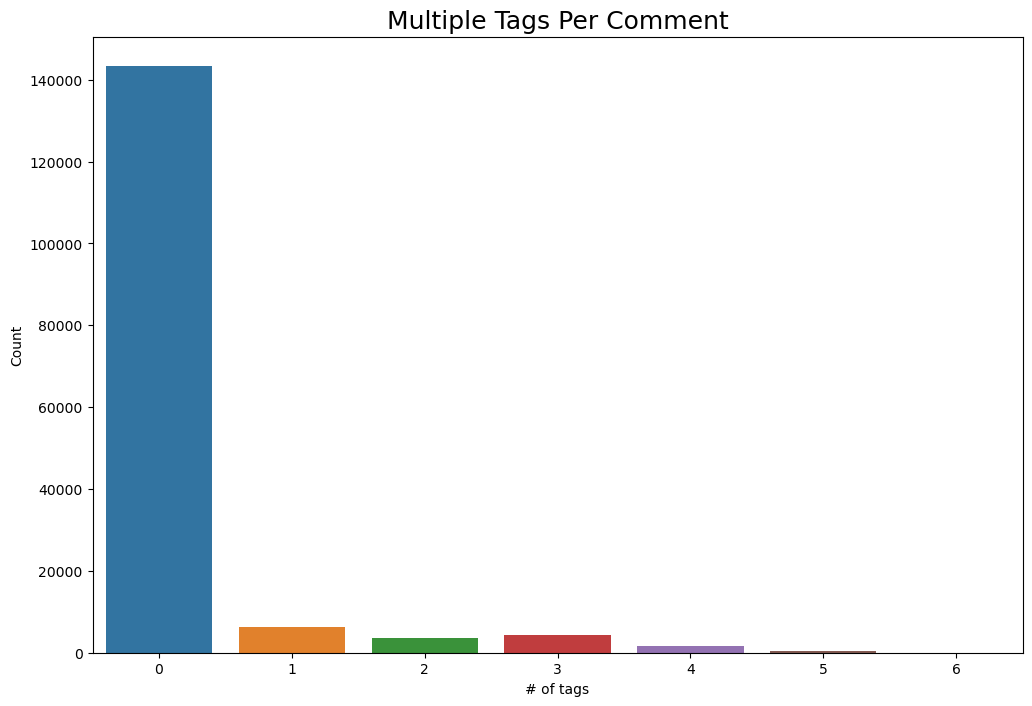

In [17]:
f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(
    x=count_tags.index,
    y=count_tags.values
)
ax.set_title("multiple tags per comment".title(),
            fontsize=18)
ax.set_xlabel("# of tags")
ax.set_ylabel("Count")
plt.show()

### Relationship between features

Let's have a look at the relation between tags.

In [18]:
# Correlation plot
# Isolate columns for our correlation matrix.
corr_columns = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
corr_df = train_df[corr_columns]

# Correlation matrix
corr = corr_df.corr()
corr

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
obscene,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
insult,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
identity_hate,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


We can see that there is not a negative correlation between tags

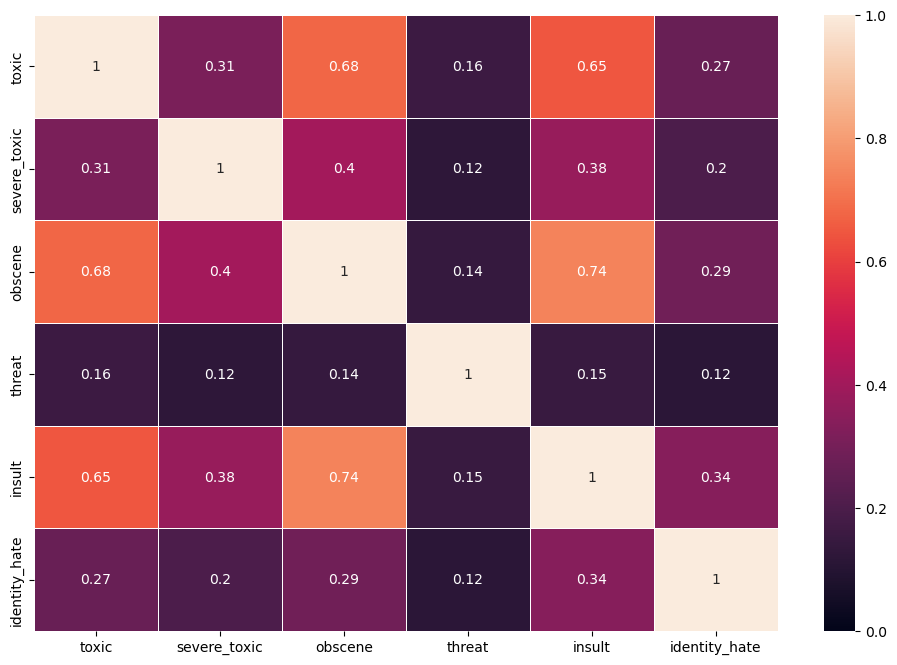

In [19]:
# Visualize correlation matrix
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    linewidths=0.5,
    ax=ax,
    vmin=0,
    vmax=1
)
plt.show()

The above plot indicates a pattern of co-occurrance. It does not apply here, since the variables involved are `categorical` variables.

In [20]:
column_names = corr_columns + ["is_clean"]
for col in column_names:
    print("\n* {} comment:".format(col))
    print(train_df[train_df[col] == 1]["comment_text"].iloc[np.random.randint(0, 20)])


* toxic comment:
I think that your a Fagget get a oife and burn in Hell I hate you 'm sorry we cant have any more sex i'm running out of conndoms

* severe_toxic comment:
72.94.188.92 

Yo what the fuck is your problem fucking around with my page! leave it the fuck alone!

* obscene comment:
Fuck off

You are NOT an administrator. You DON'T have the authority to tell me what to do.

* threat comment:
I'm also a sock puppet of this account...SUPRISE!!
-sincerely,
            The man that will track you down from the Internet and kill you

* insult comment:
Kill all niggers. 

I have hard, that others have said this.. should this be included? That racists sometimes say these.

* identity_hate comment:
"

You have evidence from ME!  I presented you with tone of evidence, but you reject it because it goes against your fictional ideas of what New England is or should be.  Even eastern(southeast anyway) CT is not into this New England thing, which actually shocked me!  I have told you time 

We can see that each comment is includes alphanumeric and special symbols.

### Save DataFrame

In [21]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tags,is_clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,1


In [22]:
test_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tags,is_clean
5,0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0,0,1
7,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0,0,1
11,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0,0,1
13,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0,0,1
14,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0,0,1


In [23]:
train_df.to_csv(path_or_buf="../data/train_EDA.csv", index=False)
test_df.to_csv(path_or_buf="../data/test_EDA.csv", index=False)